# MIE1513 - sna assignment

In [ ]:
! pip install networkx
! pip install plotly
! pip install colorlover
! pip install NRCLex

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("corona_tweets.csv")

In [ ]:
df['date']=pd.to_datetime(df['date'].str.slice(0,-5),format='%Y-%m-%dT%H:%M:%S')

In [ ]:
df

date             user  \
0       2020-11-01 04:25:52  bernadettecomm1   
1       2020-11-01 04:25:52       bluemeade7   
2       2020-11-01 04:25:52         _raauull   
3       2020-11-01 04:25:53   purushothama_n   
4       2020-11-01 04:25:53       fato_frank   
...                     ...              ...   
2550189 2020-11-02 04:25:13       paulkolyer   
2550190 2020-11-02 04:25:13        rediation   
2550191 2020-11-02 04:25:13  igotmybikefixed   
2550192 2020-11-02 04:25:13          kenoir2   
2550193 2020-11-02 04:25:13       swampy_ght   

                                                     tweet  
0        RT @ClarkeMicah: Anti-lockdown Letters to MPs ...  
1        RT @petestrzok: RT is registered with the Depa...  
2        RT @essmeraldasauce: COVID cases broke single-...  
3        RT @SadhguruJV: By their very design, most cit...  
4        RT @RealCandaceO: Germany and France go back i...  
...                                                    ...  
2550189            RT @JoyAnnReid: What country is this???  
2550190  RT @missvbackup: You sound like homophonic whi...  
2550191  @realDonaldTrump Trump is real ladies man 👍👐 C...  
2550192  RT @MollyJongFast: Mexico’s not going to pay f...  
2550193  @ThatManKevo @DevaSimmons @xvnderXX @JoeBiden ...  

[2550194 rows x 3 columns]

### find most common hashtags

In [ ]:
from collections import Counter
allTweets = df["tweet"].str.cat(sep=' ')
tweetWords = [word.strip(""" ,.:'\";""").lower() for word in allTweets.split()]
hashTags = [word for word in tweetWords if word.startswith("#")]
hashTagsCounter = Counter(hashTags)

In [ ]:
hashTagsCounter.most_common(100)

[('#1', 87335),
 ('#covid19', 75713),
 ('#coronavirus', 21472),
 ('#covid', 13419),
 ('#lockdown', 11150),
 ('#covid_19', 8178),
 ('#covidiots', 6838),
 ('#lockdown2', 6576),
 ('#vote', 6328),
 ('#wewillnotcomply', 6109),
 ('#pandemic', 5692),
 ('#trump', 4568),
 ('#closetheschools', 3860),
 ('#wearamask', 3587),
 ('#marr', 3005),
 ('#breaking', 2942),
 ('#panicbuying', 2796),
 ('#closeschoolsnow', 2678),
 ('#…', 2587),
 ('#excludeduk', 2540),
 ('#nasaanangpangulo', 2532),
 ('#nhs', 2420),
 ('#art', 2340),
 ('#lockdownuk', 2282),
 ('#staysafe', 2199),
 ('#covid19uk', 2110),
 ('#halloween2020', 2096),
 ('#stayhome', 1888),
 ('#votehimout', 1884),
 ('#corona', 1859),
 ('#covid-19', 1824),
 ('#biden', 1811),
 ('#bidenharris2020', 1807),
 ('#wfh', 1786),
 ('#votebluetoendthenightmare', 1767),
 ('#halloween', 1717),
 ('#2ndlockdown', 1656),
 ('#florida', 1564),
 ('#election2020', 1478),
 ('#trumpdeliverednothing', 1408),
 ('#taiwanmodel', 1381),
 ('#trumpvirus', 1372),
 ('#', 1365),
 ('#wor

the chosen hashtag is "#usa"

In [ ]:
# make a new dataframe just with our hashtag
usaTag = df[df["tweet"].str.lower().str.contains("#usa", na=False, regex=False)].copy()

In [ ]:
def addMentionedColumn(df):
    
    def mentionsList(txt):
        allWords = [word.strip(""" ,.:'\";""").lower() for word in txt.split()]
        allNames = [word.strip("@") for word in allWords if word.startswith("@")]
        uniqueNames = list(set(allNames))
        return allNames
    
    df["mentioned"] = df["tweet"].apply(mentionsList)

In [ ]:
addMentionedColumn(usaTag)

In [ ]:
usaTag

date             user  \
9325    2020-11-01 04:33:33  jqvk729akqjwfix   
10744   2020-11-01 04:34:46      griffkohout   
10982   2020-11-01 04:34:57  inconvenienttr5   
14772   2020-11-01 04:38:05       labisiffre   
15981   2020-11-01 04:39:05     nishitshah11   
...                     ...              ...   
2535905 2020-11-02 04:15:00    missrukiibaby   
2537118 2020-11-02 04:15:50           ancray   
2540539 2020-11-02 04:18:18     denniskoch10   
2544528 2020-11-02 04:21:07      nvrflycoach   
2550136 2020-11-02 04:25:10   stephen_manion   

                                                     tweet  \
9325     RT @WakDiv: Oh boi.\n\nLooks like I might be i...   
10744    @realDonaldTrump only thing more #pathetic &am...   
10982    @ddiamond #Trump has BLOOD On His Hands: \n\n#...   
14772    If you don’t vote\nDon’t tell me you’re a patr...   
15981    RT @RijoMJohn: #India &amp; #USA both did abou...   
...                                                    ...   
2535905  RT @USAmbKenya: Pres Trump is delivering on th...   
2537118  What is going to be worse for Americans this C...   
2540539  If anyone is on White House grounds, the gover...   
2544528  RT @USAmbKenya: Pres Trump is delivering on th...   
2550136  @CortesSteve @realDonaldTrump What? Both Latin...   

                              mentioned  
9325                           [wakdiv]  
10744                 [realdonaldtrump]  
10982                        [ddiamond]  
14772                                []  
15981                       [rijomjohn]  
...                                 ...  
2535905                    [usambkenya]  
2537118                              []  
2540539                              []  
2544528                    [usambkenya]  
2550136  [cortessteve, realdonaldtrump]  

[1082 rows x 4 columns]

In [ ]:
#usaTag['liststring'] = usaTag['mentioned'].agg(lambda x: ','.join(map(str, x)))
#usaTag.liststring.nunique() 

## Q1. Build a Mention Graph

In [ ]:
# for all the tweets with your hashtag, build the mention graph
import networkx as nx
def mentionGraph(df):
    g = nx.Graph()
    
    for (index, date,user, tweet, mentionedUsers) in df.itertuples():
        for mentionedUser in mentionedUsers:
            if mentionedUser in df['user']:
              print(mentionedUser)
            if (user in g) and (mentionedUser in g[user]):
                g[user][mentionedUser]["numberMentions"] += 1
            else:
                g.add_edge(user, mentionedUser, numberMentions=1)
    
    return g

In [ ]:
usaGraph = mentionGraph(usaTag)

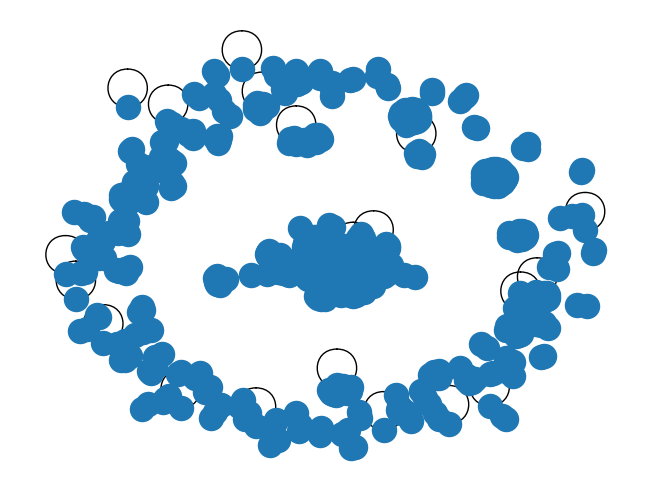

In [ ]:
nx.draw(usaGraph, with_labels=False)

In [ ]:
print("# nodes:", len(usaGraph.nodes()))
print("# edges:", len(usaGraph.edges()))

# nodes: 606
# edges: 598


There are 606 nodes and 598 edges in the mention graph

### Histogram of degree distribution of the graph

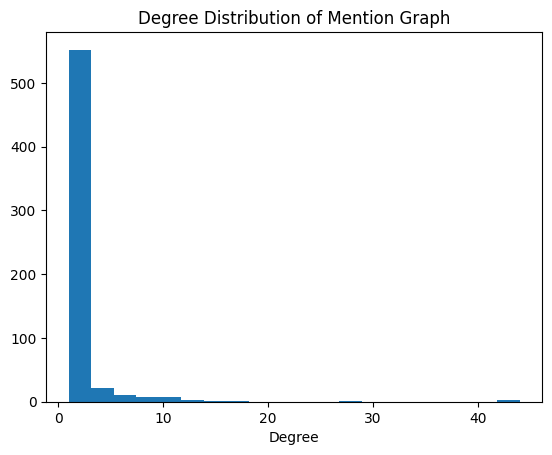

In [ ]:
import matplotlib.pyplot as plt

degrees = [d for n, d in nx.degree(usaGraph)]
plt.hist(degrees, bins = 20)
plt.title("Degree Distribution of Mention Graph")
plt.xlabel("Degree")
plt.show()


In [ ]:
nx.degree(usaGraph)
degrees = [d for n, d in nx.degree(usaGraph)]

In [ ]:
degrees_count = [[x,degrees.count(x)] for x in set(degrees)]
degrees_count

[[1, 441],
 [2, 90],
 [3, 21],
 [4, 15],
 [5, 6],
 [6, 6],
 [7, 4],
 [8, 5],
 [9, 2],
 [42, 2],
 [11, 5],
 [44, 1],
 [10, 2],
 [12, 2],
 [15, 1],
 [13, 1],
 [18, 1],
 [27, 1]]

Based on the results, most of the users are with a low degree and only a few with a high degree. In social networks, same protion of users(have a high degree) are more active than other users.

### log-log scatterplot

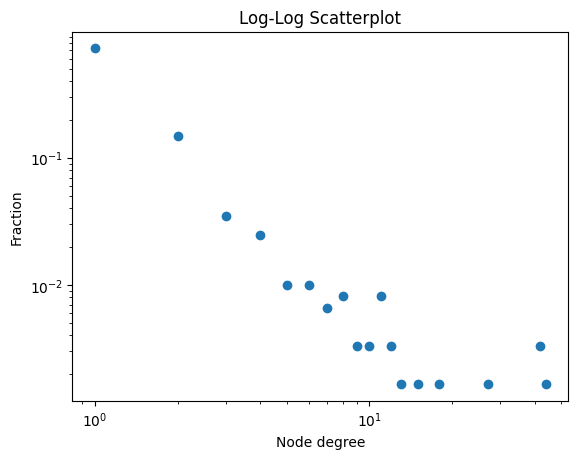

In [ ]:
total_users = len(degrees)

node_degree = []
fraction = []
for degree, count in degrees_count:
  node_degree.append(degree)
  fraction.append(count/total_users)
  
# log-log scatterplot
plt.scatter(node_degree, fraction)
plt.xscale('log')
plt.yscale('log')

plt.xlabel('Node degree')
plt.ylabel('Fraction')
plt.title('Log-Log Scatterplot')
plt.show()

The mention graph does not exhibit a power law trend since the distribution is not a straight line. This may because most of nodes are only a few degrees away from each other and only a few nodes with high degrees play a central role and connect different parts of the network.


### tweets for the highest-weighted edge

In [268]:
node1, node2, num_mentions = max(usaGraph.edges(data=True), key=lambda x: x[2]['numberMentions'])
print(node1, node2, num_mentions)
tweets = usaTag[((usaTag['user'] == node1) & (usaTag['mentioned'].apply(lambda x: node2 in x))) |
                ((usaTag['user'] == node2) & (usaTag['mentioned'].apply(lambda x: node1 in x)))]

print("Tweets:")
for tweet in tweets['tweet'][:25]:
    print(tweet)
    print()

realdonaldtrump toronto_nian {'numberMentions': 9}
Tweets:
@TeamTrump @realDonaldTrump #USA #Coronavirus - Nov 01 - 
Here's is today's latest US cases under #DonaldTrump management:
➡️Confirmed Cases: 9,447,155
➡️Confirmed Deaths: 236,318 DEAD AMERICANS-Maybe next might be YOU or YOURS!
Call it: #TrumpVirus 
Facts: https://t.co/TBwaVLz0Uu
#Elections2020 #Vote2020 https://t.co/OrtDe5LyiJ

@GOP @realDonaldTrump #USA #Coronavirus - Nov 01 - 
Here's is today's latest US cases under #DonaldTrump management:
➡️Confirmed Cases: 9,447,155
➡️Confirmed Deaths: 236,318 DEAD AMERICANS-Maybe next might be YOU or YOURS!
Call it: #TrumpVirus 
Facts: https://t.co/TBwaVLz0Uu
#Elections2020 #Vote2020 https://t.co/bDB34u7I91

@MonicaCrowley @realDonaldTrump #USA #Coronavirus - Nov 01 - 
Here's is today's latest US cases under #DonaldTrump management:
➡️Confirmed Cases: 9,447,155
➡️Confirmed Deaths: 236,318 DEAD AMERICANS-Maybe next might be YOU or YOURS!
Call it: #TrumpVirus 
Facts: https://t.co/TBwaVLz0

The highest-weighted edge connects by users "realdonaldtrump" and "toronto_nian". That indicates these 2 users have the most frequent connections. Based on the result, all tweets are sent by user "toronto_nian" to "realdonaldtrump" and the tweets' contents may indicate "toronto_nian" were greatly disappointed to the current situation in USA and President Trump polices.

### visualization of the mention graph

In [ ]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

In [ ]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.graph_objs import *
import plotly.graph_objects as go
init_notebook_mode(connected=True)

In [ ]:
import colorlover as cl
from IPython.display import HTML

In [274]:
# map purd color scale to 300 cells
purd = cl.scales['9']['seq']['PuRd']
purd300 = cl.interp(purd, 300)
HTML(cl.to_html(purd300))

In [478]:
def plotNetworkSizeColor(graph):
    _, _, num_mentions_max = max(usaGraph.edges(data=True), key=lambda x: x[2]['numberMentions'])
    _, _, num_mentions_min = min(usaGraph.edges(data=True), key=lambda x: x[2]['numberMentions'])

    
    scatters=[]

    for (node1, node2) in graph.edges():
        x0, y0 = graph.nodes[node1]['pos']
        x1, y1 = graph.nodes[node2]['pos']
        edgeWidth = graph[node1][node2]['numberMentions']
        edgeColor = int(299*(edgeWidth-num_mentions_min["numberMentions"])/(num_mentions_max["numberMentions"]-num_mentions_min["numberMentions"]))
        s = Scatter(
                x=[x0, x1],
                y=[y0, y1],
                text = "none",
                hoverinfo="text",
                mode='lines', 
                line=scatter.Line(width=edgeWidth ,color=purd300[edgeColor]))
                
        scatters.append(s)



    for node in graph.nodes():
        xPos, yPos = graph.nodes[node]['pos']
        s = Scatter(
                x=[xPos], 
                y=[yPos], 
                text="User: %s <br>" % (node),
                hoverinfo='text',
                mode='markers',
                marker=dict(
                    color='#888',     
                    line=dict(width=2)))
        scatters.append(s)
    
    layout = Layout(showlegend=False)
    fig = Figure(data=scatters, layout=layout)
    fig.update_layout(height = 800, width = 1200)
    iplot(fig, show_link=False)

In [ ]:
import random
def addRandomPositions(graph):
    posDict = dict((node,(random.gauss(0,10),random.gauss(0,10))) for node in graph.nodes())
    nx.set_node_attributes(graph, name="pos", values=posDict)

In [ ]:
addRandomPositions(usaGraph)

In [ ]:
def applyLayout(graph, layoutFunc):
    posDict = layoutFunc(graph) 
    nx.set_node_attributes(graph, name="pos", values=posDict)

In [479]:
configure_plotly_browser_state()

usaGraphCircular = usaGraph.copy()
applyLayout(usaGraphCircular, nx.circular_layout)
configure_plotly_browser_state()
plotNetworkSizeColor(usaGraphCircular)

## Q2. Content Analysis

In [376]:
#Natural Language Processing Packages
import re
import nltk

## Download Resources

nltk.download("stopwords")
nltk.download('punkt')
from nltk import tokenize
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
def getTopKWords(df, kwords):

    stop = set(stopwords.words('english'))
    counter = Counter()

    reviews = df['tweet'].values

    for review in reviews:
            counter.update([word.lower() 
                            for word 
                            in re.findall(r'\w+', review) 
                            if word.lower() not in stop and len(word) > 2])
    topk = counter.most_common(kwords)
    return topk

In [257]:
topk = getTopKWords(usaTag, 50)

In [350]:
# the most frequent 50 words
topk

[('usa', 1058),
 ('https', 1023),
 ('covid19', 449),
 ('trump', 424),
 ('coronavirus', 312),
 ('covid', 300),
 ('cases', 232),
 ('death', 216),
 ('new', 172),
 ('vote', 144),
 ('like', 135),
 ('america', 134),
 ('deaths', 129),
 ('pandemic', 126),
 ('population', 124),
 ('amp', 111),
 ('recovered', 103),
 ('northamerica', 102),
 ('sarscov2', 102),
 ('critical', 101),
 ('forecast', 101),
 ('000', 91),
 ('biden', 89),
 ('realdonaldtrump', 83),
 ('india', 80),
 ('canada', 75),
 ('get', 71),
 ('world', 65),
 ('next', 63),
 ('news', 63),
 ('election', 62),
 ('might', 61),
 ('fashion', 57),
 ('looks', 56),
 ('donaldtrump', 56),
 ('usarmy', 55),
 ('germany', 55),
 ('stay', 53),
 ('joebiden', 53),
 ('france', 53),
 ('trouble', 51),
 ('florida', 51),
 ('newyork', 51),
 ('lockdown', 51),
 ('wakdiv', 50),
 ('boi', 50),
 ('tuned', 50),
 ('happen', 50),
 ('usairforce', 50),
 ('response', 50)]

From the most frequent non-stopwords list, there are several high frequency words such as "covid19", "pandemic","death" and "forecast". These may suggest that the impact and response policies are major topics of the discussion.

Besides, the words such as "vote", "Trump" and "Biden" are also mentioned in the wordlist. This indicates that the 2020 US presidential election is also a common theme here.

### add hover information to the mention graph

In [309]:
def getTopKWords_user(df, kwords, user):
    #groundTruth = "positive" or "negative"

    stop = set(stopwords.words('english'))
    counter = Counter()

    gt_df = df[df["user"] == user]
    reviews = gt_df['tweet'].values

    for review in reviews:
            counter.update([word.lower() 
                            for word 
                            in re.findall(r'\w+', review) 
                            if word.lower() not in stop and len(word) > 2])
    topk = counter.most_common(kwords)
    topk = [n for n, d in topk]
    return topk

In [476]:
def plotNetworkSizeColor_hover(graph):
    _, _, num_mentions_max = max(usaGraph.edges(data=True), key=lambda x: x[2]['numberMentions'])
    _, _, num_mentions_min = min(usaGraph.edges(data=True), key=lambda x: x[2]['numberMentions'])

    
    scatters=[]

    for (node1, node2) in graph.edges():
        x0, y0 = graph.nodes[node1]['pos']
        x1, y1 = graph.nodes[node2]['pos']
        edgeWidth = graph[node1][node2]['numberMentions']
        edgeColor = int(299*(edgeWidth-num_mentions_min["numberMentions"])/(num_mentions_max["numberMentions"]-num_mentions_min["numberMentions"]))
        s = Scatter(
                x=[x0, x1],
                y=[y0, y1],
                text = "none",
                hoverinfo="text",
                mode='lines', 
                line=scatter.Line(width=edgeWidth ,color=purd300[edgeColor]))
                
        scatters.append(s)



    for node in graph.nodes():
        top3 = getTopKWords_user(usaTag, 3, node)

        if len(top3) > 0:
            text1 = "User: %s <br>" % (node) + "<br> Top 3 words: %s" % ', '.join(top3)
            xPos1, yPos1 = graph.nodes[node]['pos']

            s = Scatter(
                x=[xPos1], 
                y=[yPos1], 
                text=text1,
                hoverinfo='text',
                mode='markers',
                marker=dict(
                    color='#888',     
                    line=dict(width=2)))

        else:
            text1 = "User: %s <br>" % (node) + "<br> No words found"
            xPos2, yPos2 = graph.nodes[node]['pos']

            s = Scatter(
                x=[xPos2], 
                y=[yPos2], 
                text=text1,
                hoverinfo='text',
                mode='markers',
                marker=dict(
                    color='red',     
                    line=dict(width=2)))

        
        scatters.append(s)
    
    layout = Layout(showlegend=False)
    fig = Figure(data=scatters, layout=layout)
    fig.update_layout(height = 800, width = 1200)
    iplot(fig, show_link=False)

In [477]:
configure_plotly_browser_state()

usaGraphCircular = usaGraph.copy()
applyLayout(usaGraphCircular, nx.circular_layout)
configure_plotly_browser_state()
plotNetworkSizeColor_hover(usaGraphCircular)

In [349]:
#each users top 3 words
top3_l = []
for node in usaGraphCircular.nodes():
  top3 = getTopKWords_user(usaTag, 3, node)
  if len(top3) > 0:
    top3_l+=top3
Counter(top3_l).most_common()

[('usa', 53),
 ('wakdiv', 44),
 ('boi', 44),
 ('looks', 44),
 ('https', 32),
 ('trump', 30),
 ('steverudinabc7', 27),
 ('lived', 27),
 ('washington', 27),
 ('realdonaldtrump', 18),
 ('dear', 14),
 ('covid19', 13),
 ('citizens', 13),
 ('chidambara09', 12),
 ('docrussjackson', 12),
 ('rijomjohn', 10),
 ('cases', 10),
 ('amp', 9),
 ('covid', 8),
 ('atulmodani', 8),
 ('europe', 8),
 ('announced', 8),
 ('pres', 8),
 ('india', 7),
 ('vote', 7),
 ('super', 7),
 ('usambkenya', 7),
 ('biden', 6),
 ('great', 6),
 ('cold', 6),
 ('blood', 6),
 ('wealthy', 6),
 ('jefiner68', 6),
 ('obligated', 6),
 ('power', 6),
 ('actiontime', 5),
 ('catastrophic', 5),
 ('vicequeenmaria', 5),
 ('christianne67', 5),
 ('adds', 5),
 ('world', 5),
 ('potus', 4),
 ('2020', 4),
 ('today', 4),
 ('halloween', 4),
 ('americaacts', 4),
 ('america', 4),
 ('inconvenienttr5', 4),
 ('deaths', 4),
 ('hey', 4),
 ('stanford', 4),
 ('coronavirus', 4),
 ('reuters', 4),
 ('see', 4),
 ('get', 4),
 ('striking', 3),
 ('similarity', 3),


The top 3 words for each users are quite different. The words are diverse and seem cover several topics such as politics(vote, Trump, Biden, USA), covid-19(covid19, covid) , social related(http) and other general terms. It's hard to find a clear theme though those words.




## Q3. Centrality Analysis

### centrality of the nodes

In [354]:
bc = nx.betweenness_centrality(usaGraph)
pr = nx.pagerank(usaGraph)

In [480]:
def plotNetworkSizeColor_measure(graph, c_measure):
    
    maxCentr = max(c_measure.values())
    minCentr = min(c_measure.values())
    
    scatters=[]

    for (node1, node2) in graph.edges():
        x0, y0 = graph.nodes[node1]['pos']
        x1, y1 = graph.nodes[node2]['pos']
        edgeWidth = graph[node1][node2]['numberMentions']
        s = Scatter(
                x=[x0, x1],
                y=[y0, y1],
                hoverinfo='none',
                mode='lines', 
                line=scatter.Line(width=edgeWidth ,color='#888'))
        scatters.append(s)



    for node in graph.nodes():
        nodeCentr = c_measure[node]
        nodeColor = int(299*(nodeCentr-minCentr)/(maxCentr-minCentr))
        xPos, yPos = graph.nodes[node]['pos']
        s = Scatter(
                x=[xPos], 
                y=[yPos], 
                text="User: %s <br> centrality measure: %.3f" % (node, nodeCentr),
                hoverinfo='text',
                mode='markers', 
                marker=dict(
                    color=purd300[nodeColor], 
                    size=nx.degree(graph,node)*2,         
                    line=dict(width=2)))
        scatters.append(s)
    
    layout = Layout(showlegend=False)
    fig = Figure(data=scatters, layout=layout)
    fig.update_layout(height = 800, width = 1200)
    iplot(fig, show_link=False)

In [481]:

usaGraphCircular1 = usaGraph.copy()
applyLayout(usaGraphCircular1, nx.circular_layout)
configure_plotly_browser_state()
plotNetworkSizeColor_measure(usaGraphCircular1, bc)

In [482]:
usaGraphCircular2 = usaGraph.copy()
applyLayout(usaGraphCircular2, nx.circular_layout)
configure_plotly_browser_state()
plotNetworkSizeColor_measure(usaGraphCircular2, pr)

### top 5 central nodes

In [367]:
# betweenness centrality
print("Top 5 nodes of betweenness centrality:")
print()
sorted_bc = dict(sorted(bc.items(), key = lambda x: x[1], reverse = True)[:5])
sorted_bc

Top 5 nodes of betweenness centrality:



{'realdonaldtrump': 0.08633101068850095,
 'inconvenienttr5': 0.051795521048976605,
 'tpostman5': 0.02241865553074434,
 'potus': 0.021970032089513238,
 'elangomohanara1': 0.013217079918547595}

In [368]:
# pagerank 
print("Top 5 nodes of pagerank:")
print()
sorted_pr = dict(sorted(pr.items(), key = lambda x: x[1], reverse = True)[:5])
sorted_pr

Top 5 nodes of pagerank:



{'wakdiv': 0.034282152401746986,
 'inconvenienttr5': 0.026032785574588404,
 'realdonaldtrump': 0.023761708792265062,
 'steverudinabc7': 0.021381134133161617,
 'tpostman5': 0.010936905479317291}

1. The results of the centrality measures are quite similar, but not identical. The nodes "inconvenienttr5","realdonaldtrump" and "tpostman5" appear in both node list. This is because betweenness centrality is based on shortest paths, while pagerank is based on the random walk on the network and using hyperlinks between pages as a measure of importance.

2. In this report, I think the pagerank centrality are more useful. This is because pagerank focuses on quality of connections and importance of nodes more. This would help us identify the central role of the network. 



## Q4. Sentiment Analysis

### a. evaluate each tweet using NRCLex

In [387]:
from nrclex import NRCLex

In [400]:
numwords_emotion = {}
for tweet in usaTag["tweet"]:
  text_object = NRCLex(tweet)
  numwords = text_object.raw_emotion_scores
  for emo in numwords:
    if emo in numwords_emotion:
      numwords_emotion[emo] = numwords_emotion[emo] + numwords[emo]
    else:
      numwords_emotion[emo] = numwords[emo]
  
numwords_emotion


{'anticipation': 431,
 'disgust': 112,
 'negative': 637,
 'sadness': 357,
 'anger': 291,
 'positive': 785,
 'trust': 457,
 'joy': 360,
 'surprise': 303,
 'fear': 360}

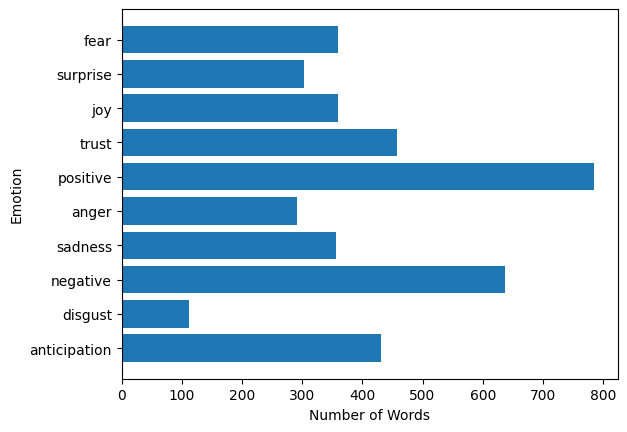

In [404]:
plt.barh(range(len(numwords_emotion)), list(numwords_emotion.values()))
plt.yticks(range(len(numwords_emotion)), list(numwords_emotion.keys()))
plt.xlabel('Number of Words')
plt.ylabel('Emotion')

plt.show()

The bar chart is reasonable to some extent. Based on the plot, positive emotion has the most words, followed by negative emotion. Since the tweets were collected during the covid19 pandemic, this may indicate users attitude towards the current situation in USA is more positive than negative. Besides, the emotion 'anticipation' also have a great portion, this may suggest people are concerned about the future situation of USA. (the hashtag selected is #usa)

### b. users with the highest fraction of words in each emotion

In [419]:
def update_dict(dict1, dict2):
  #update dictionary 1 with dictionary2
  if dict2 == {}:
    return dict1

  for i in dict2:
    if i in dict1:
      dict1[i] += dict2[i]
    else:
      dict1[i] = dict2[i]
  return dict1


In [425]:
min_tweet = 3

user_tweets = {}
for row in range(usaTag.shape[0]):
  user = usaTag.iloc[row,1]
  tweet = usaTag.iloc[row,2]
  if user in user_tweets:
    user_tweets[user].append(tweet)
  else:
    user_tweets[user] = [tweet]
  
user_emofrac = {}
for user in user_tweets:
  if len(user_tweets[user]) >= min_tweet:
    user_emo = {}

    for tweet in user_tweets[user]:
      text_object = NRCLex(tweet)
      emo = text_object.raw_emotion_scores
      user_emo = update_dict(user_emo, emo)

    if user_emo != {}:
      max_emo = max(user_emo, key = user_emo.get)
      max_emo_frac = user_emo[max_emo]/numwords_emotion[max_emo]

      user_emofrac[user] = [max_emo, max_emo_frac]

user_emofrac

{'joeanthony_nyc': ['negative', 0.006279434850863423],
 'politicsitn': ['anger', 0.01718213058419244],
 'carlito19051': ['positive', 0.014012738853503185],
 'jaysonolea1': ['positive', 0.025477707006369428],
 'maryall09819787': ['positive', 0.01019108280254777],
 'countingcovid': ['fear', 0.005555555555555556],
 'logocomposer': ['positive', 0.09171974522292993],
 'alaa_express': ['positive', 0.006369426751592357],
 'maxineprentice': ['positive', 0.012738853503184714],
 'usa_feeds': ['trust', 0.0087527352297593],
 'ouzt6': ['negative', 0.054945054945054944],
 'callersean': ['positive', 0.007643312101910828],
 'tariqaltamimi': ['negative', 0.006279434850863423],
 'usembassykenya': ['positive', 0.006369426751592357],
 'outosego': ['positive', 0.003821656050955414],
 'razibha22944503': ['trust', 0.002188183807439825],
 'crylatest': ['joy', 0.022222222222222223],
 'viralvideovlogs': ['negative', 0.004709576138147566],
 'the404code': ['anticipation', 0.016241299303944315],
 'vma2539': ['surp

In [432]:
max_user_emo = {}
for user, (emotion, score) in user_emofrac.items():
    if emotion not in max_user_emo:
        max_user_emo[emotion] = (user, score)
    elif score > max_user_emo[emotion][1]:
        max_user_emo[emotion] = (user, score)

for emotion, (user, frac) in max_user_emo.items():
    print(f"Emotion: {emotion}, Fraction: {frac}, User: {user}")

Emotion: negative, Fraction: 0.08006279434850863, User: kevinkiepe
Emotion: anger, Fraction: 0.020618556701030927, User: livingstonfinan
Emotion: positive, Fraction: 0.09171974522292993, User: logocomposer
Emotion: fear, Fraction: 0.025, User: pmagic67
Emotion: trust, Fraction: 0.0175054704595186, User: andybailen
Emotion: joy, Fraction: 0.058333333333333334, User: puerpel1
Emotion: anticipation, Fraction: 0.03944315545243619, User: ezrentalsmaster
Emotion: surprise, Fraction: 0.0429042904290429, User: vma2539
Emotion: joeanthony_nyc, Fraction: 0.006279434850863423, User: negative
Emotion: politicsitn, Fraction: 0.01718213058419244, User: anger


### c. correlation between any dimension of emotion and pagerank centrality measures

In [461]:
# all tweets of nodes
node_tweets = {}
for row in range(usaTag.shape[0]):
  user = usaTag.iloc[row,1]
  tweet = usaTag.iloc[row,2]
  node = usaTag.iloc[row,3]
  if node != []:
    if user in node_tweets:
      node_tweets[user].append(tweet)
    else:
      node_tweets[user] = [tweet]

    for n in node:
      if n in node_tweets:
        node_tweets[n].append(tweet)
      else:
        node_tweets[n] = [tweet]


# create a dictionary in the pattern {node: highest_fraction of any emotion} for all nodes
nodes_emofrac = {}

for user in node_tweets:
  user_emo = {}

  for tweet in node_tweets[user]:
    text_object = NRCLex(tweet)
    emo = text_object.raw_emotion_scores
    user_emo = update_dict(user_emo, emo)

  if user_emo != {}:
    max_emo = max(user_emo, key = user_emo.get)
    max_emo_frac = user_emo[max_emo]/numwords_emotion[max_emo]

    nodes_emofrac[user] = max_emo_frac
  else:
    nodes_emofrac[user] = 0

nodes_emofrac


{'jqvk729akqjwfix': 0.002320185614849188,
 'wakdiv': 0.11600928074245939,
 'griffkohout': 0.003821656050955414,
 'realdonaldtrump': 0.08280254777070063,
 'inconvenienttr5': 0,
 'ddiamond': 0,
 'nishitshah11': 0,
 'rijomjohn': 0.005095541401273885,
 'gusv01': 0.0025477707006369425,
 'labisiffre': 0.005095541401273885,
 'drrnikhil': 0,
 'auskoalaxpress': 0.005555555555555556,
 'udnxl6ldg4t4eae': 0.002320185614849188,
 'gatewaypundit': 0,
 'kareemslick': 0.0025477707006369425,
 'liltunechi': 0.0025477707006369425,
 'potus': 0.023547880690737835,
 'brithume': 0,
 'kimstrassel': 0,
 'rkylesmith': 0,
 'richlowry': 0,
 'lucysunman': 0.0025477707006369425,
 'smartraveller': 0.005095541401273885,
 'ahmed28869640': 0.002320185614849188,
 'adashertiphreh': 0,
 'nygovcuomo': 0,
 'billdeblasio': 0,
 'barheihei': 0,
 'thesaudadeguy': 0,
 'miacarlos17': 0.002320185614849188,
 'superfind': 0.005555555555555556,
 'borisjohnson': 0.005555555555555556,
 'funkstylerecord': 0.0015698587127158557,
 'mrmiyag

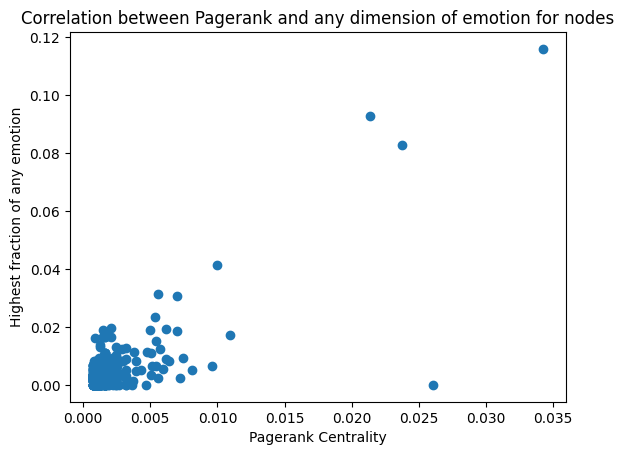

In [463]:
x_pr = list(pr.values())
y_nodes_emofrac = list(nodes_emofrac.values())

plt.scatter(x_pr,y_nodes_emofrac)

plt.xlabel('Pagerank Centrality')
plt.ylabel('Highest fraction of any emotion')
plt.title('Correlation between Pagerank and any dimension of emotion for nodes')

plt.show()

It seems to have a positive correlation relationship between any dimension of emotion and pagerank centrality measure for all nodes, since the points in the scatter plot form a clear, upward-sloping trend from left to right.

One hypothesis is that tweets with high emotional content tend to resonate with users and generate more engagements. Hence the tweets could have a strong ability to spread the information and build a strong following, leading the increase of pagerank centrality measures.
